In [100]:
import pandas as pd
df = pd.read_csv('pop_year.csv')

In [101]:
df

,Year,World Population,Yearly Change %,Net Change,Density (P/km²)
0,2023,"8,045,311,447",0.88 %,"70,206,291",54
1,2022,"7,975,105,156",0.83 %,"65,810,005",54
2,2021,"7,909,295,151",0.87 %,"68,342,271",53
3,2020,"7,840,952,880",0.98 %,"76,001,848",53
4,2019,"7,764,951,032",1.06 %,"81,161,204",52
...,...,...,...,...,...
92,-1000,"50,000,000",,,
93,-2000,"27,000,000",,,
94,-3000,"14,000,000",,,
95,-4000,"7,000,000",,,


In [102]:
columns_to_convert = ['Yearly Change %']
df[columns_to_convert] = df[columns_to_convert].apply(lambda x: pd.to_numeric(x.str.rstrip('%'), errors='coerce'))

In [103]:
# Remove '%' and convert to float for specific columns
columns_to_convert = ['World Population', 'Net Change', 'Density (P/km²)']
df[columns_to_convert] = df[columns_to_convert].apply(lambda x: pd.to_numeric(x.str.replace(',', ''), errors='coerce'))


In [104]:
df

,Year,World Population,Yearly Change %,Net Change,Density (P/km²)
0,2023,8045311447,0.88,70206291.0,54.0
1,2022,7975105156,0.83,65810005.0,54.0
2,2021,7909295151,0.87,68342271.0,53.0
3,2020,7840952880,0.98,76001848.0,53.0
4,2019,7764951032,1.06,81161204.0,52.0
...,...,...,...,...,...
92,-1000,50000000,NaN,NaN,NaN
93,-2000,27000000,NaN,NaN,NaN
94,-3000,14000000,NaN,NaN,NaN
95,-4000,7000000,NaN,NaN,NaN


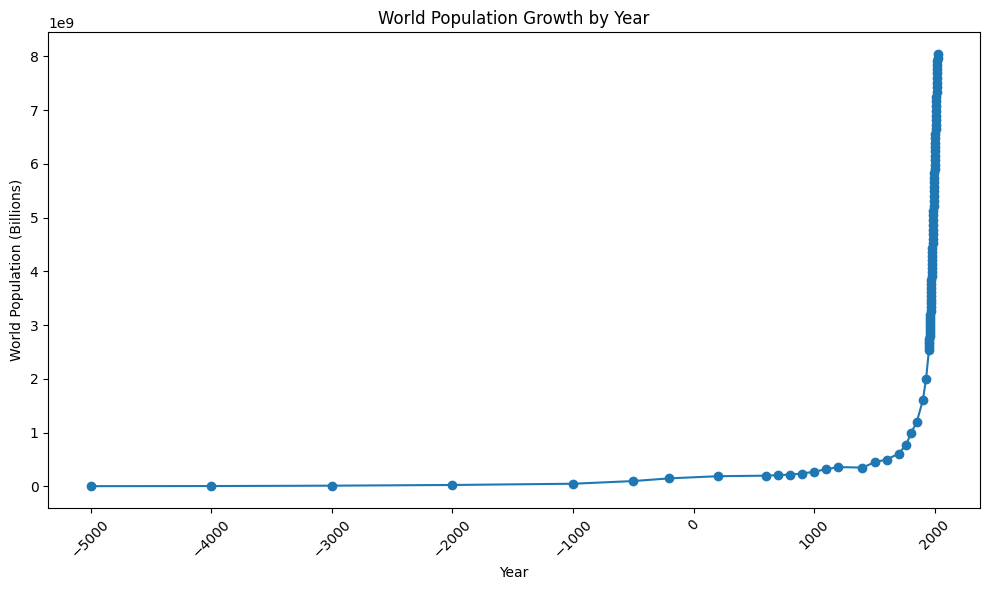

In [85]:
import matplotlib.pyplot as plt
import numpy as np
# Create a line plot
# Convert columns to NumPy arrays
year_array = np.array(df['Year'])
population_array = np.array(df['World Population'])

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(year_array, population_array, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('World Population (Billions)')
plt.title('World Population Growth by Year')

plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [91]:
!pip install dash 

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [92]:
!pip install plotly

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [96]:
!pip install gunicorn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 663.7 kB/s eta 0:00:00a 0:00:01
DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [97]:
!pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 911.2 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 3.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 3.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 4.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 4.8 MB/s eta 0:00:0000:0100:01
DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [105]:
import plotly.express as px

# Assuming df is your DataFrame
fig = px.line(df, x='Year', y='World Population', title='World Population Over Time',
              labels={'World Population': 'Population', 'Year': 'Year'},
              line_shape='linear')  # You can adjust 'line_shape' for different line styles

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='World Population',
    template='plotly_dark',
    showlegend=True,
    margin=dict(l=0, r=0, t=30, b=0),
)

fig.show()


In [109]:
import plotly.express as px

# Assuming df is your DataFrame
fig = px.line(df, x='Year', y=['World Population', 'Yearly Change %', 'Net Change', 'Density (P/km²)'],
              title='World Population Metrics Over Time',
              labels={'value': 'Metric Value', 'variable': 'Metric'},
              line_shape='linear',  # You can adjust 'line_shape' for different line styles
              )

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Metric Value',
    template='plotly_dark',
    showlegend=True,
    margin=dict(l=0, r=0, t=30, b=0),
)

fig.show()


In [107]:


# Assuming df is your DataFrame
fig_yearly_change = px.line(df, x='Year', y='Yearly Change %', title='Yearly Change % Over Time',
                            labels={'Yearly Change %': 'Yearly Change %', 'Year': 'Year'},
                            line_shape='linear')  # You can adjust 'line_shape' for different line styles

fig_yearly_change.update_layout(
    xaxis_title='Year',
    yaxis_title='Yearly Change %',
    template='plotly_dark',
    showlegend=True,
    margin=dict(l=0, r=0, t=30, b=0),
)

fig_yearly_change.show()


In [108]:


# Assuming df is your DataFrame
fig_net_change = px.line(df, x='Year', y='Net Change', title='Net Change Over Time',
                         labels={'Net Change': 'Net Change', 'Year': 'Year'},
                         line_shape='linear')  # You can adjust 'line_shape' for different line styles

fig_net_change.update_layout(
    xaxis_title='Year',
    yaxis_title='Net Change',
    template='plotly_dark',
    showlegend=True,
    margin=dict(l=0, r=0, t=30, b=0),
)

fig_net_change.show()


In [110]:
import plotly.express as px

# Assuming df is your DataFrame
fig_density = px.line(df, x='Year', y='Density (P/km²)', title='Population Density Over Time',
                      labels={'Density (P/km²)': 'Density (P/km²)', 'Year': 'Year'},
                      line_shape='linear')  # You can adjust 'line_shape' for different line styles

fig_density.update_layout(
    xaxis_title='Year',
    yaxis_title='Density (P/km²)',
    template='plotly_dark',
    showlegend=True,
    margin=dict(l=0, r=0, t=30, b=0),
)

fig_density.show()


In [95]:
import dash
from dash import dcc, html
import pandas as pd
import plotly.express as px

# Sample DataFrame
data = {
    'Country': ['India', 'China', 'United States'],
    'Population (2023)': [1428627663, 1425671352, 339996563],
    'Yearly Change %': [0.81, -0.02, 0.50],
    'Density (P/km²)': [481, 152, 37],
    'Urban Pop %': [36.0, 65.0, 83.0],
    'World Share %': [17.76, 17.72, 4.23]
}

df = pd.DataFrame(data)

# Create the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div(children=[
    html.H1(children='Population Dashboard'),

    # Bar Plot for Population
    dcc.Graph(
        id='population-bar',
        figure=px.bar(df, x='Country', y='Population (2023)', title='Population in 2023 by Country')
    ),

    # Line Plot for Yearly Change
    dcc.Graph(
        id='yearly-change-line',
        figure=px.line(df, x='Country', y='Yearly Change %', title='Yearly Change in Population (%) by Country')
    ),

    # Scatter Plot for Urban Population Percentage vs. World Share
    dcc.Graph(
        id='scatter-urban-world',
        figure=px.scatter(df, x='Urban Pop %', y='World Share %', color='Country', size='Population (2023)',
                         title='Urban Population vs. World Share')
    ),


])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


In [ ]:
import pandas as pd
df = pd.read_csv('world_data.csv')